<a href="https://colab.research.google.com/github/md05-portfolio/Microsoft_ML_Challenge/blob/main/Explore_RWD_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective** : Describe the data consisting of student grades, and discuss how to make basic comparisons between data.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# Load data from a Microsoft Github Training folder
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
students_df = pd.read_csv('grades.csv',delimiter=',',header='infer')
students_df.head()

--2023-08-08 01:53:23--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322 [text/plain]
Saving to: ‘grades.csv.1’

grades.csv.1        100%[===================>]     322  --.-KB/s    in 0s      

2023-08-08 01:53:23 (11.7 MB/s) - ‘grades.csv.1’ saved [322/322]



,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0


In [6]:
students_df.describe()

,StudyHours,Grade
count,23.000000,22.000000
mean,10.413043,49.181818
std,3.447338,21.737912
min,1.000000,3.000000
25%,8.750000,36.250000
50%,10.000000,49.500000
75%,12.250000,62.750000
max,16.000000,97.000000


**describe()** is powerful built in function to list the descirptive statistics about a dataframe, however since this is supposed to be a portfolio, we'll take a longer route to understand the distribution and variability.

Lets proceed !

In [4]:
#identify missing data
students_df[students_df.isnull().any(axis=1)]

,Name,StudyHours,Grade
22,Bill,8.0,NaN
23,Ted,NaN,NaN


In [7]:
'''Remove any rows with missing data. Since Grades is a determining field, safe to assume these rows can be eliminated.
Other option would be to impute using fillna such as below :
students_df.StudyHours = students_df.StudyHours.fillna(students_df.StudyHours.mean())
'''
students_df = students_df.dropna(axis=0, how='any')

In [8]:
# Calculate who passed, assuming '60' is the grade needed to pass
passes  = pd.Series(students_df['Grade'] >= 60)

In [9]:
# Add a column indicating who passed to the Pandas dataframe
students_df = pd.concat([students_df, passes.rename("Pass")], axis=1)

# Print the result to review
print(students_df)

         Name  StudyHours  Grade   Pass
0         Dan       10.00   50.0  False
1       Joann       11.50   50.0  False
2       Pedro        9.00   47.0  False
3       Rosie       16.00   97.0   True
4       Ethan        9.25   49.0  False
5       Vicky        1.00    3.0  False
6    Frederic       11.50   53.0  False
7      Jimmie        9.00   42.0  False
8      Rhonda        8.50   26.0  False
9    Giovanni       14.50   74.0   True
10  Francesca       15.50   82.0   True
11      Rajab       13.75   62.0   True
12    Naiyana        9.00   37.0  False
13       Kian        8.00   15.0  False
14      Jenny       15.50   70.0   True
15     Jakeem        8.00   27.0  False
16     Helena        9.00   36.0  False
17      Ismat        6.00   35.0  False
18      Anila       10.00   48.0  False
19       Skye       12.00   52.0  False
20     Daniel       12.50   63.0   True
21      Aisha       12.00   64.0   True


In [10]:
# Create a function that we can re-use
def show_distribution(var_data):
    '''
    This function will plot a distribution (graph) and display
    '''

    # Get basic descriptive statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,mean_val,med_val,mod_val,max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (8,4))

    # Plot the histogram
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



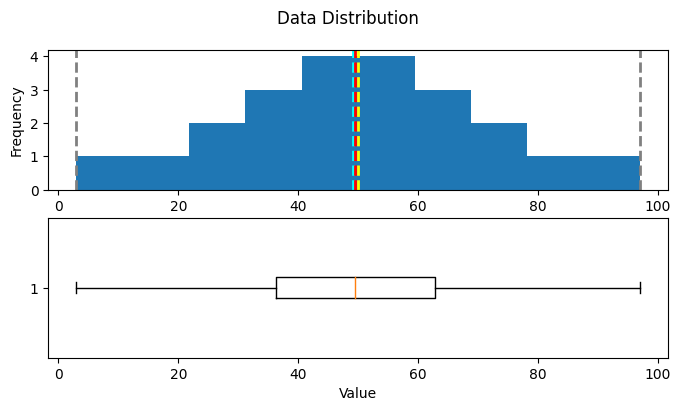

In [11]:
#Test the function and check the distribution on Grades
show_distribution(students_df['Grade'])

Minimum:1.00
Mean:10.52
Median:10.00
Mode:9.00
Maximum:16.00



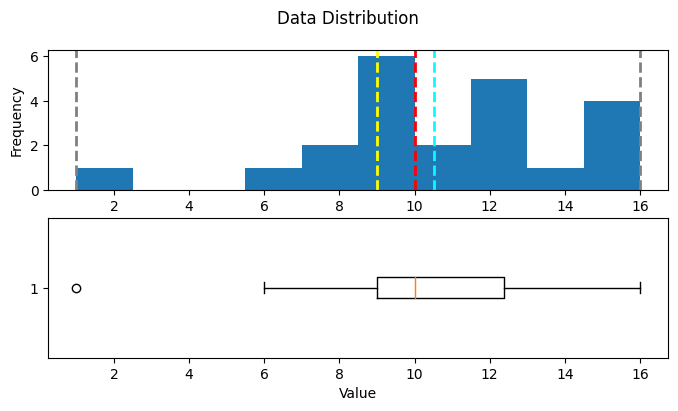

In [13]:
#Yay! As we would have expected by looking at describe command, grades are spread symmetrically
#Lets examine StudyHours
sh = students_df['StudyHours']
# Call the function
show_distribution(sh)

Minimum:6.00
Mean:10.98
Median:10.00
Mode:9.00
Maximum:16.00



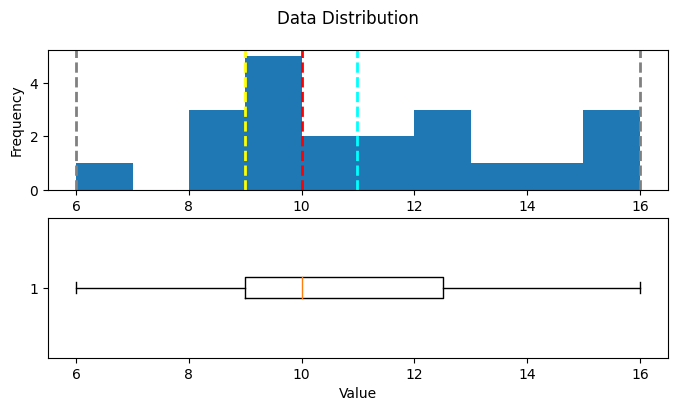

In [14]:
'''
Notice the box plot specifically, whiskers only begin at around 6.0, indicating that the vast majority of the first quarter of the data is above this value.
The minimum is marked with an o, indicating that it is statistically an outlier: a value that lies significantly outside the range of the rest of the distribution.
Lets see by setting minimum Studyhour to be 1
'''

sh = students_df[students_df.StudyHours>1]['StudyHours']

# Call the function, functions save a lot of repetitive effort and this is one such case where we visually explore the data.
show_distribution(sh)

Minimum:6.00
Mean:10.98
Median:10.00
Mode:9.00
Maximum:16.00



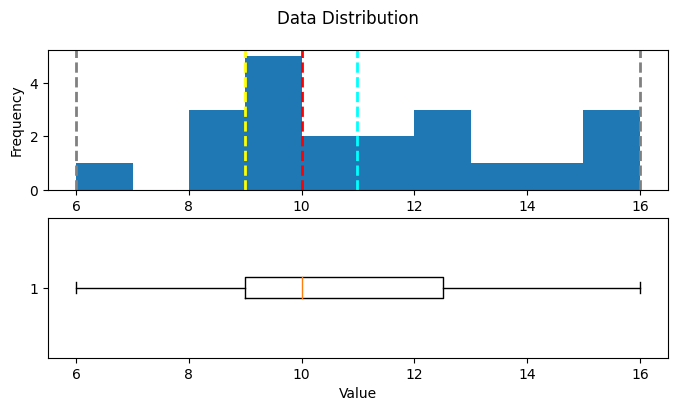

In [16]:
'''
It was easy to identify the the value 1 as a true outlier here and exclude it.
In the real world, it would be unusual to exclude data at the extremes without more justification , when our sample size is so small.
In real world scenarios, it would make sense to consider outliers as being values that fall below or above percentiles within which most of the data lie.
For example, the following code uses the quantile function to exclude observations below the 0.01th percentile (the value above which 99% of the data reside).
'''
# calculate the 0.01th percentile
qt001 = students_df.StudyHours.quantile(0.01)

# Get the variable to examine
sh = students_df[students_df.StudyHours>qt001]['StudyHours']

# Call the function...yet again!
show_distribution(sh)

In [18]:
'''
Notice the clean display of box plot. Notice most of hours lie between 8 & 13. However values such as 16 seem to pull the mean. Lets get additional details by plotting density graph.
Time to build another function
'''
def show_density(var_data):
    fig = plt.figure(figsize=(8,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Density Plot')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()


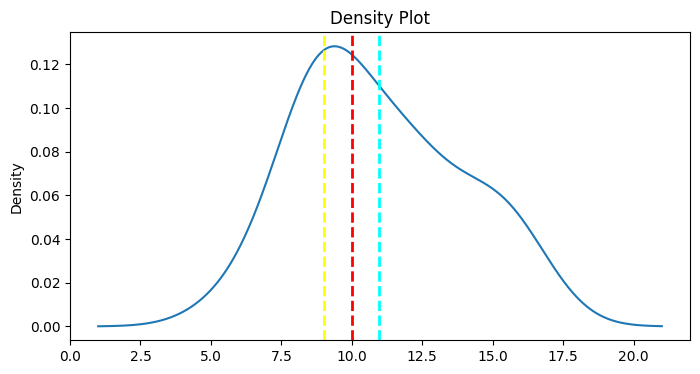

In [19]:
# Plot studyhours
show_density(sh)

In [20]:
'''
distribution is right skewed. Higher study hours, however small in amount, drag the mean to the higher end.

Lets find variability; we generally use range, variance and std deviation.
'''
for col_name in ['Grade','StudyHours']:
    sh = students_df[col_name]
    range = sh.max() - sh.min()
    variance = sh.var()
    std_dev = sh.std()
    print('\n{}:\n - Range: {:.2f}\n - Variance: {:.2f}\n - Std.Dev: {:.2f}'.format(col_name, range, variance, std_dev))


Grade:
 - Range: 94.00
 - Variance: 472.54
 - Std.Dev: 21.74

StudyHours:
 - Range: 15.00
 - Variance: 12.16
 - Std.Dev: 3.49
